In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline  
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

In [2]:
data = pd.read_csv('../Data/Mobile Price Classification.csv')
X = data[data.columns[:-1]]

X = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled,columns=data.columns[:-1])

y = data['price_range']
np.random.seed(3)

# Split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=2)

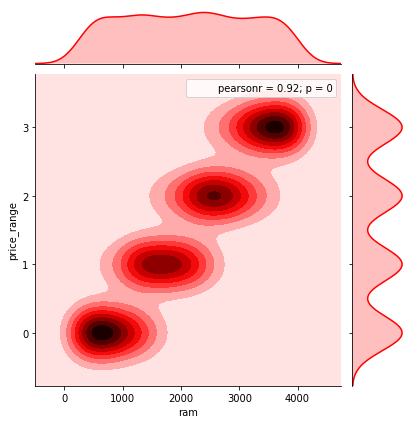

In [17]:
sn.jointplot(x='ram',y='price_range',data=data,color='red',kind='kde');

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [4]:
def plot_validation_curve(train_scores, test_scores, title, xlabel, param_range):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [5]:
def plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy")
    plt.legend(loc="best")
    plt.show()

## Error Rates - SVM  

<module 'matplotlib.pyplot' from 'c:\\users\\craig\\appdata\\local\\programs\\python\\python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

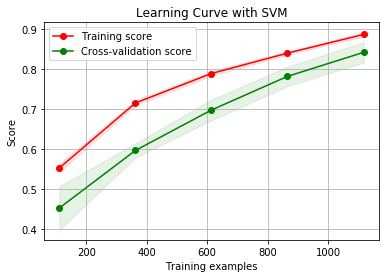

In [6]:
clf = svm.SVC(decision_function_shape='ovr',random_state=3)

train_sizes, train_scores, test_scores = learning_curve(
        clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

title = 'Learning Curve with SVM'
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

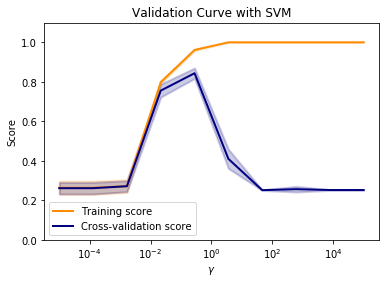

In [7]:
clf = svm.SVC(decision_function_shape='ovr',random_state=3)

param_range = np.logspace(-5, 5, 10)
train_scores, test_scores = validation_curve(
    clf, X_train, y_train, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with SVM"
xlabel = "$\gamma$"
plot_validation_curve(train_scores, test_scores, title, xlabel, param_range)

## Error Rate - Decision Tree

<module 'matplotlib.pyplot' from 'c:\\users\\craig\\appdata\\local\\programs\\python\\python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

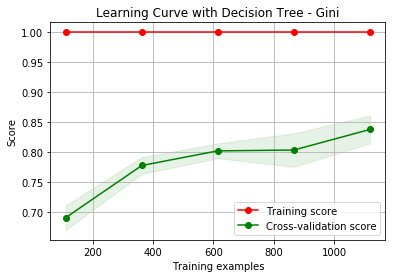

In [8]:
# Gini
clf = tree.DecisionTreeClassifier(criterion='gini',random_state=3)
title = 'Learning Curve with Decision Tree - Gini'
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

<module 'matplotlib.pyplot' from 'c:\\users\\craig\\appdata\\local\\programs\\python\\python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

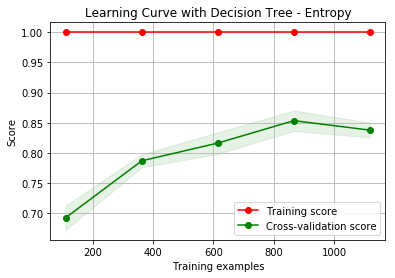

In [9]:
# Entropy
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=3)
title = 'Learning Curve with Decision Tree - Entropy'
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

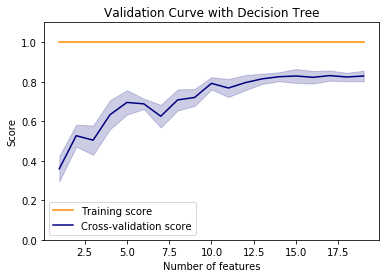

In [10]:
clf = tree.DecisionTreeClassifier(criterion='gini',random_state=3)

param_range = [i for i in range(1,X_train.shape[1])]
train_scores, test_scores = validation_curve(
    clf, X_train, y_train, param_name="max_features", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Decision Tree"
xlabel = "Number of features"
plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

## Error Rate - Boosted Decision Tree

<module 'matplotlib.pyplot' from 'c:\\users\\craig\\appdata\\local\\programs\\python\\python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

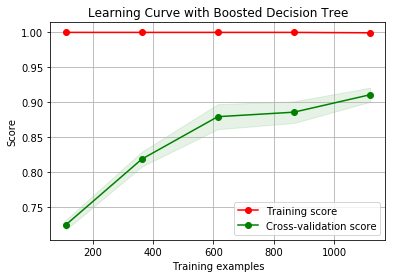

In [11]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=3)
title = 'Learning Curve with Boosted Decision Tree'
plot_learning_curve(clf, title, X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))

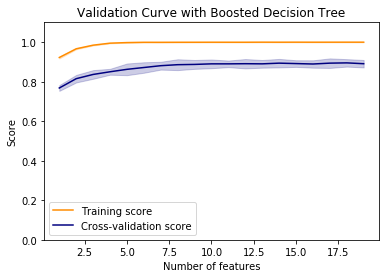

In [12]:
clf = GradientBoostingClassifier(random_state=3)

param_range = [i for i in range(1,X_train.shape[1])]
train_scores, test_scores = validation_curve(
    clf, X_train, y_train, param_name="max_features", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
title = "Validation Curve with Boosted Decision Tree"
xlabel = "Number of features"

plot_validation_curve_for_tree(train_scores, test_scores, title, xlabel, param_range)

## Performance Comparisons - SVM

In [13]:
def plot_validation_curve_SVM_4(test1,test2,test3,test4, title, xlabel, param_range):
    test_scores_mean_1 = np.mean(test1, axis=1)
    test_scores_std_1 = np.std(test1, axis=1)
    test_scores_mean_2 = np.mean(test2, axis=1)
    test_scores_std_2 = np.std(test2, axis=1)
    test_scores_mean_3 = np.mean(test3, axis=1)
    test_scores_std_3 = np.std(test3, axis=1)
    test_scores_mean_4 = np.mean(test4, axis=1)
    test_scores_std_4 = np.std(test4, axis=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    
    plt.semilogx(param_range, test_scores_mean_1, label="RBF",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean_1 - test_scores_std_1,
                     test_scores_mean_1 + test_scores_std_1, alpha=0.2,
                     color="navy", lw=lw)
    
    plt.semilogx(param_range, test_scores_mean_2, label="Linear",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, test_scores_mean_2 - test_scores_std_2,
                     test_scores_mean_2 + test_scores_std_2, alpha=0.2,
                     color="darkorange", lw=lw)

    plt.semilogx(param_range, test_scores_mean_3, label="Sigmoid",
                 color="g", lw=lw)
    plt.fill_between(param_range, test_scores_mean_3 - test_scores_std_3,
                     test_scores_mean_3 + test_scores_std_3, alpha=0.2,
                     color="g", lw=lw)

    plt.semilogx(param_range, test_scores_mean_4, label="Poly",
                 color="r", lw=lw)
    plt.fill_between(param_range, test_scores_mean_4 - test_scores_std_4,
                     test_scores_mean_4 + test_scores_std_4, alpha=0.2,
                     color="r", lw=lw)
    
    
    
    plt.legend(loc="best")
    plt.show()

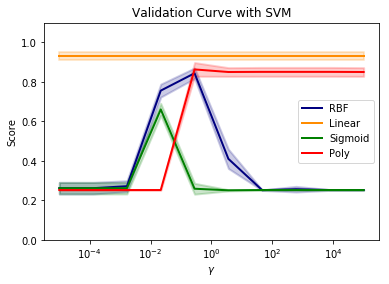

In [14]:
param_range = np.logspace(-5, 5, 10)
title = "Validation Curve with SVM"
xlabel = "$\gamma$"

clf = svm.SVC(decision_function_shape='ovr',random_state=3)
train_scores, test_scores_rbf = validation_curve(
    clf, X_train, y_train, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
train_scores, test_scores_linear = validation_curve(
    clf, X_train, y_train, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)


clf = svm.SVC(decision_function_shape='ovr',kernel='sigmoid',random_state=3)
train_scores, test_scores_sigmoid = validation_curve(
    clf, X_train, y_train, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

clf = svm.SVC(decision_function_shape='ovr',kernel='poly',random_state=3)
train_scores, test_scores_poly = validation_curve(
    clf, X_train, y_train, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)



plot_validation_curve_SVM_4(test_scores_rbf, test_scores_linear, test_scores_sigmoid, test_scores_poly, title, xlabel, param_range)

Text(0.5,1,'Confusion Martix for Linear')

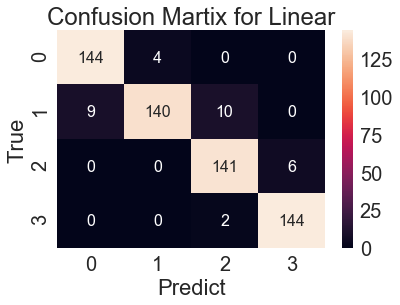

In [15]:
clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3,gamma=2.78255940e-01)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, ['0','1','2','3'],['0','1','2','3'])
sn.set(font_scale=2)#for label size
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')
ax.set_title('Confusion Martix for Linear')

Text(0.5,1,'Confusion Martix for Sigmoid')

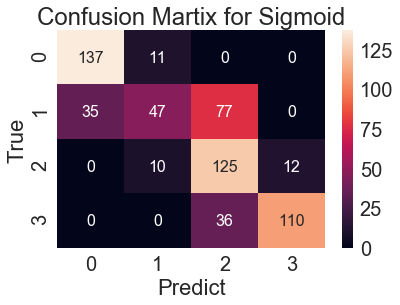

In [16]:
clf = svm.SVC(decision_function_shape='ovr',kernel='sigmoid',random_state=3,gamma=2.15443469e-02)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, ['0','1','2','3'],['0','1','2','3'])
sn.set(font_scale=2)#for label size
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')
ax.set_title('Confusion Martix for Sigmoid')

## Performance Comparisons - Decision Tree

In [17]:
def plot_figure(score):
    plt.title('Decision Tree')
    plt.xlabel("leaf nodes")
    plt.ylabel("Score")
    labels = ['depth'+str(i) for i in range(1,11)]
    plt.ylim(0.75, .9)
    for i in range(1,11):
        plt.plot(max_leaf_nodes,score[(i-1)*10:i*10],label=labels[i-1])
        plt.legend()
    plt.legend(loc="best")
    plt.show()

In [9]:
max_depth_list = [i for i in range(1,11)]
max_leaf_nodes = [i for i in range(10,110,10)]

In [19]:
scores_decision = []
for depth in max_depth_list:
    for node in max_leaf_nodes:
        model = tree.DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=depth, max_leaf_nodes=node)
        model.fit(X_train,y_train)
        scores_decision.append(model.score(X_test,y_test))

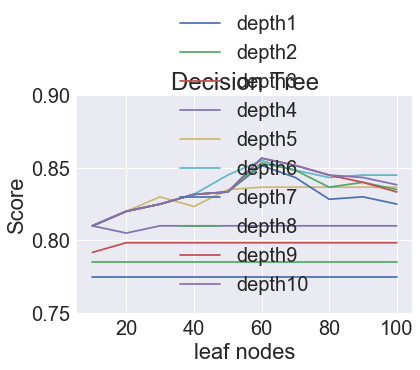

In [20]:
plot_figure(scores_decision)

Text(0.5,1,'Confusion Martix Depth=3')

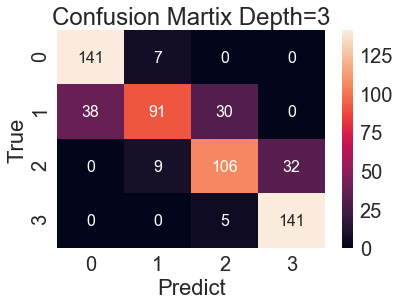

In [21]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=3, max_leaf_nodes=60)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, ['0','1','2','3'],['0','1','2','3'])
sn.set(font_scale=2)#for label size
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')
ax.set_title('Confusion Martix Depth=3')

Text(0.5,1,'Confusion Martix Depth=6')

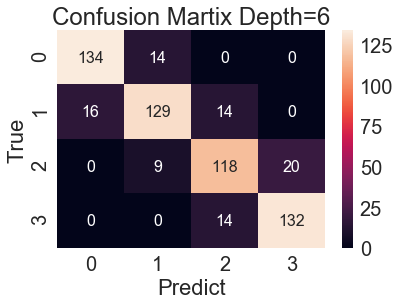

In [22]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=6, max_leaf_nodes=60)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, ['0','1','2','3'],['0','1','2','3'])
sn.set(font_scale=2)#for label size
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')
ax.set_title('Confusion Martix Depth=6')

Text(0.5,1,'Confusion Martix Depth=10')

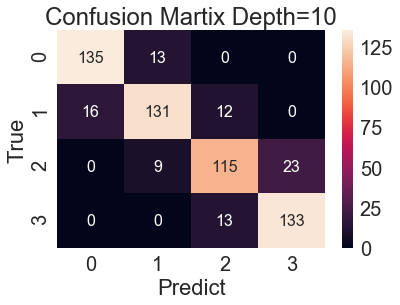

In [23]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=3, max_depth=10, max_leaf_nodes=60)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, ['0','1','2','3'],['0','1','2','3'])
sn.set(font_scale=2)#for label size
ax = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size
ax.set(xlabel='Predict', ylabel='True')
ax.set_title('Confusion Martix Depth=10')

## Performance Comparisons - Boosted Decision Tree

In [10]:
def plot_figure_boost(score):
    plt.title('Boosted Decision Tree')
    plt.xlabel("leaf nodes")
    plt.ylabel("Score")
    labels = ['depth'+str(i) for i in range(1,11)]
    plt.ylim(0.85,.95)
    for i in range(1,11):
        plt.plot(max_leaf_nodes,score[(i-1)*10:i*10],label=labels[i-1])
        plt.legend()
    plt.legend(loc="best")
    plt.show()

In [11]:
scores = []
for depth in max_depth_list:
    for node in max_leaf_nodes:
        model = GradientBoostingClassifier(n_estimators=100, random_state=3, max_depth=depth, max_leaf_nodes=node)
        model.fit(X_train,y_train)
        scores.append(model.score(X_test,y_test))

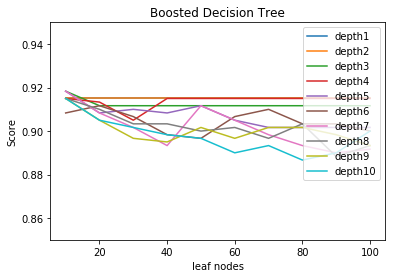

In [12]:
plot_figure_boost(scores)

In [13]:
def plot_figure_boost_LR(score):
    plt.title('Boosted Decision Tree')
    plt.xlabel("Learning Rate")
    plt.ylabel("Score")
    labels = ['depth'+str(i) for i in range(1,11)]
    plt.ylim(0.85,.95)
    for i in range(1,11):
        plt.plot(learning_rate,score[(i-1)*10:i*10],label=labels[i-1])
        plt.legend()
    plt.legend(loc="best")
    plt.show()

In [14]:
scores_LR = []
learning_rate = [i/10 for i in range(1,11)]
for depth in max_depth_list:
    for node in learning_rate:
        model = GradientBoostingClassifier(n_estimators=100, random_state=3, max_depth=depth, learning_rate=node)
        model.fit(X_train,y_train)
        scores_LR.append(model.score(X_test,y_test))

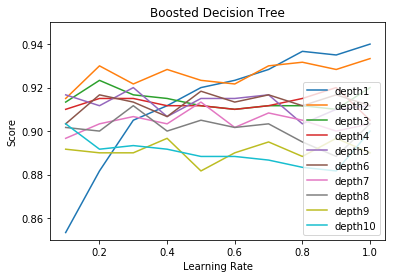

In [15]:
plot_figure_boost_LR(scores_LR)

## Comparisons of the three learning algorithm

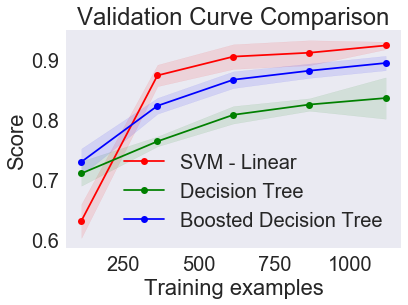

In [30]:
train_sizes = np.linspace(.1, 1.0, 5)
clf = svm.SVC(decision_function_shape='ovr',kernel='linear',random_state=3)
train_sizes, train_scores_svm, test_scores_svm = learning_curve(clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=train_sizes)



clf = tree.DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=10,max_leaf_nodes=60)
train_sizes, train_scores_DT, test_scores_DT = learning_curve(clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=train_sizes)



clf = GradientBoostingClassifier(random_state=3,max_depth=1,max_features=10,learning_rate=0.5)
train_sizes, train_scores_BDT, test_scores_BDT = learning_curve(clf, X_train, y_train, cv=5, n_jobs=1, train_sizes=train_sizes)



plt.figure()
plt.title('Validation Curve Comparison')
#plt.ylim(0.85,.95)
plt.xlabel("Training examples")
plt.ylabel("Score")
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)
test_scores_std_svm = np.std(test_scores_svm, axis=1)
test_scores_mean_DT = np.mean(test_scores_DT, axis=1)
test_scores_std_DT = np.std(test_scores_DT, axis=1)
test_scores_mean_BDT = np.mean(test_scores_BDT, axis=1)
test_scores_std_BDT = np.std(test_scores_BDT, axis=1)

plt.grid()

plt.fill_between(train_sizes, test_scores_mean_svm - test_scores_std_svm,
                 test_scores_mean_svm + test_scores_std_svm, alpha=0.1,
                 color="r")

plt.fill_between(train_sizes, test_scores_mean_DT - test_scores_std_DT,
                 test_scores_mean_DT + test_scores_std_DT, alpha=0.1, color="g")

plt.fill_between(train_sizes, test_scores_mean_BDT - test_scores_std_BDT,
                 test_scores_mean_BDT + test_scores_std_BDT, alpha=0.1, color="b")


plt.plot(train_sizes, test_scores_mean_svm, 'o-', color="r",
         label="SVM - Linear")
plt.plot(train_sizes, test_scores_mean_DT, 'o-', color="g",
         label="Decision Tree")
plt.plot(train_sizes, test_scores_mean_BDT, 'o-', color="b",
         label="Boosted Decision Tree")

plt.legend(loc="best")
